#                                               **    Libraries Import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,r2_score,recall_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Load Dataset**

In [3]:
data=pd.read_csv("/content/drive/My Drive/Titanic Dataset/titanic3.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# **Data Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# **Data Cleaning **

<Axes: >

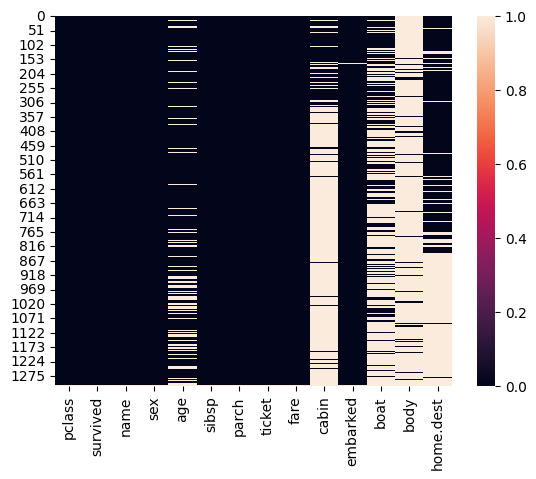

In [6]:
sns.heatmap(data.isnull())

In [7]:
print(data.isnull().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [8]:
data.drop(["cabin","body","boat","home.dest"],axis=1,inplace=True)

<Axes: >

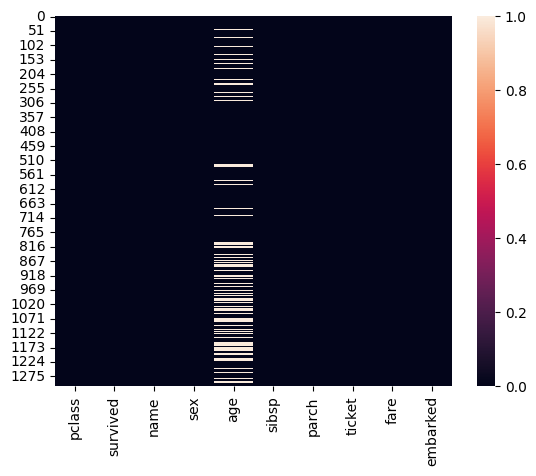

In [9]:
sns.heatmap(data.isnull())

In [10]:
data['age'].fillna(data['age'].median(),inplace=True )

<ipython-input-10-1a69479183b3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(),inplace=True )


<Axes: >

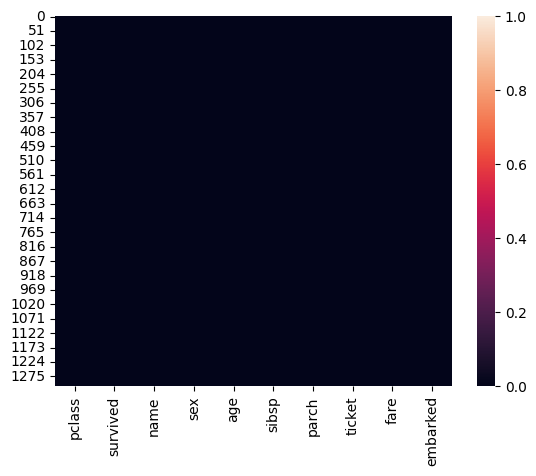

In [11]:
sns.heatmap(data.isnull())

In [12]:
print("Duplicate:",data.duplicated().sum())
print(data.isnull().sum())

Duplicate: 0
pclass      1
survived    1
name        1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    3
dtype: int64


In [13]:
data.dropna(inplace=True)
data=data.drop("name",axis=1)

In [14]:
print(data.isnull().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


# **Data CLeaning Complete**

Data Info

In [15]:
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S


# **Categorical Data Conversion**

In [16]:
label_encoder=LabelEncoder()
data["sex"]=label_encoder.fit_transform(data["sex"])
data["embarked"]=label_encoder.fit_transform(data["embarked"])

In [17]:
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,24160,211.3375,2
1,1.0,1.0,1,0.9167,1.0,2.0,113781,151.5500,2
2,1.0,0.0,0,2.0000,1.0,2.0,113781,151.5500,2
3,1.0,0.0,1,30.0000,1.0,2.0,113781,151.5500,2
4,1.0,0.0,0,25.0000,1.0,2.0,113781,151.5500,2


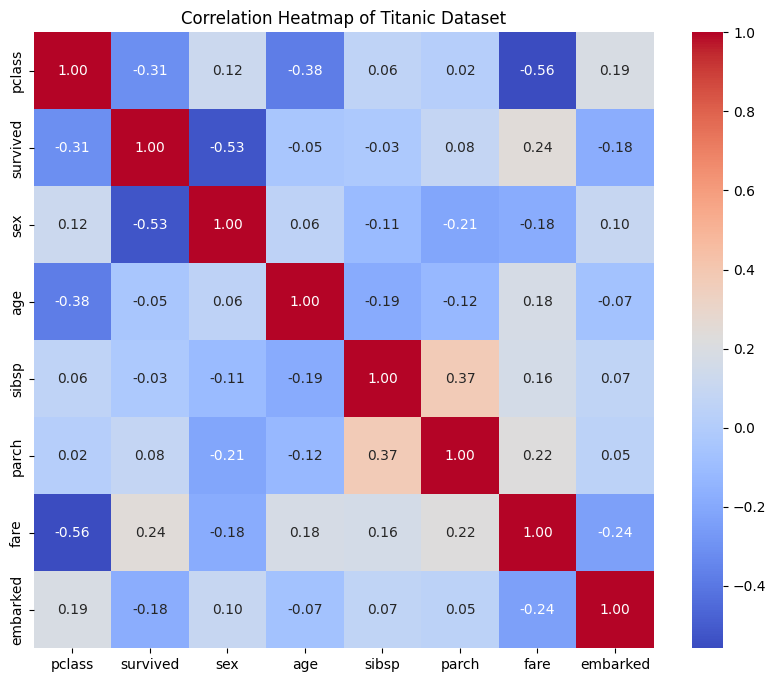

In [18]:
numeric_columns = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

# **Data Spliting **


1.   X in feature and Y in label




In [19]:
features=["pclass","sex","age","sibsp","parch","fare","embarked"]
label=["survived"]
X=data[features]
Y=data[label]
print("X:",X)
print("Y:",Y)

X:       pclass  sex      age  sibsp  parch      fare  embarked
0        1.0    0  29.0000    0.0    0.0  211.3375         2
1        1.0    1   0.9167    1.0    2.0  151.5500         2
2        1.0    0   2.0000    1.0    2.0  151.5500         2
3        1.0    1  30.0000    1.0    2.0  151.5500         2
4        1.0    0  25.0000    1.0    2.0  151.5500         2
...      ...  ...      ...    ...    ...       ...       ...
1304     3.0    0  14.5000    1.0    0.0   14.4542         0
1305     3.0    0  28.0000    1.0    0.0   14.4542         0
1306     3.0    1  26.5000    0.0    0.0    7.2250         0
1307     3.0    1  27.0000    0.0    0.0    7.2250         0
1308     3.0    1  29.0000    0.0    0.0    7.8750         2

[1306 rows x 7 columns]
Y:       survived
0          1.0
1          1.0
2          0.0
3          0.0
4          0.0
...        ...
1304       0.0
1305       0.0
1306       0.0
1307       0.0
1308       0.0

[1306 rows x 1 columns]


`Data Fiting `




In [20]:
# Standarize numeric value
sacler=StandardScaler()
X[["age","fare"]]=sacler.fit_transform(X[['age',"fare"]])

<ipython-input-20-406362b7d305>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["age","fare"]]=sacler.fit_transform(X[['age',"fare"]])


In [21]:
print("X:",X)

X:       pclass  sex       age  sibsp  parch      fare  embarked
0        1.0    0 -0.034861    0.0    0.0  3.442063         2
1        1.0    1 -2.219833    1.0    2.0  2.286663         2
2        1.0    0 -2.135549    1.0    2.0  2.286663         2
3        1.0    1  0.042943    1.0    2.0  2.286663         2
4        1.0    0 -0.346074    1.0    2.0  2.286663         2
...      ...  ...       ...    ...    ...       ...       ...
1304     3.0    0 -1.163008    1.0    0.0 -0.362727         0
1305     3.0    0 -0.112664    1.0    0.0 -0.362727         0
1306     3.0    1 -0.229369    0.0    0.0 -0.502433         0
1307     3.0    1 -0.190467    0.0    0.0 -0.502433         0
1308     3.0    1 -0.034861    0.0    0.0 -0.489871         2

[1306 rows x 7 columns]


**`Splitinng Data into Train and Test (X,Y)`**

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# **Model instance**

In [23]:
model=LogisticRegression()

# ***Train Model ***

In [24]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# **Prediction OF model**

In [25]:
Y_pred=model.predict(X_test)

# **Evaluation**

In [26]:
accuracy=accuracy_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
classification_Report=classification_report(Y_test,Y_pred)
prec=precision_score(Y_pred,Y_test);
print("Accuracy:",accuracy*100)
print("F1:",f1*100)
print(classification_Report)
print("Precision:",prec*100)

Accuracy: 78.62595419847328
F1: 73.33333333333333
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       154
         1.0       0.75      0.71      0.73       108

    accuracy                           0.79       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262

Precision: 71.29629629629629


# **Create a dctionary of Multiplie models**

In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

**`create a list in which each model value ..`**

In [28]:
precision = []
f1 = []
accuracy = []
model_names = []
recall=[]
report=[]

Run loop to Train the model declared in dictonary and predict the value

In [29]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    acc = accuracy_score(Y_test,Y_predict)
    prec = precision_score(Y_test,Y_predict, average='weighted')
    rec = recall_score(Y_test,Y_predict, average='weighted')
    f1_s = f1_score(Y_test, Y_predict, average='weighted')
    rep = classification_report(Y_test, Y_predict, output_dict=True)
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1.append(f1_s)
    model_names.append(name)
    report.append(rep)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

# **Convert dictonary into Dataframe**

In [30]:
metrics_df = pd.DataFrame({ 'Model':
model_names,
 'Accuracy': accuracy,
 'Precision': precision, 'Recall': recall,
 'F1-Score': f1,
  "Report" :report
 })

# **Print the comparison of Models **

In [31]:
print(metrics_df)
# Display model results

                    Model  Accuracy  Precision    Recall  F1-Score  \
0     Logistic Regression  0.786260   0.785084  0.786260  0.785248   
1           Random Forest  0.759542   0.757760  0.759542  0.757728   
2           Decision Tree  0.744275   0.742852  0.744275  0.743287   
3                AdaBoost  0.774809   0.773327  0.774809  0.772650   
4       Gradient Boosting  0.797710   0.797069  0.797710  0.795329   
5  Support Vector Machine  0.786260   0.784982  0.786260  0.784432   
6     K-Nearest Neighbors  0.797710   0.796744  0.797710  0.796929   
7             Naive Bayes  0.770992   0.771687  0.770992  0.771294   

                                              Report  
0  {'0.0': {'precision': 0.80625, 'recall': 0.837...  
1  {'0.0': {'precision': 0.7791411042944786, 'rec...  
2  {'0.0': {'precision': 0.7735849056603774, 'rec...  
3  {'0.0': {'precision': 0.7878787878787878, 'rec...  
4  {'0.0': {'precision': 0.8023952095808383, 'rec...  
5  {'0.0': {'precision': 0.798780487804

<ipython-input-32-54d1faccd9fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=metrics_df, palette="viridis")


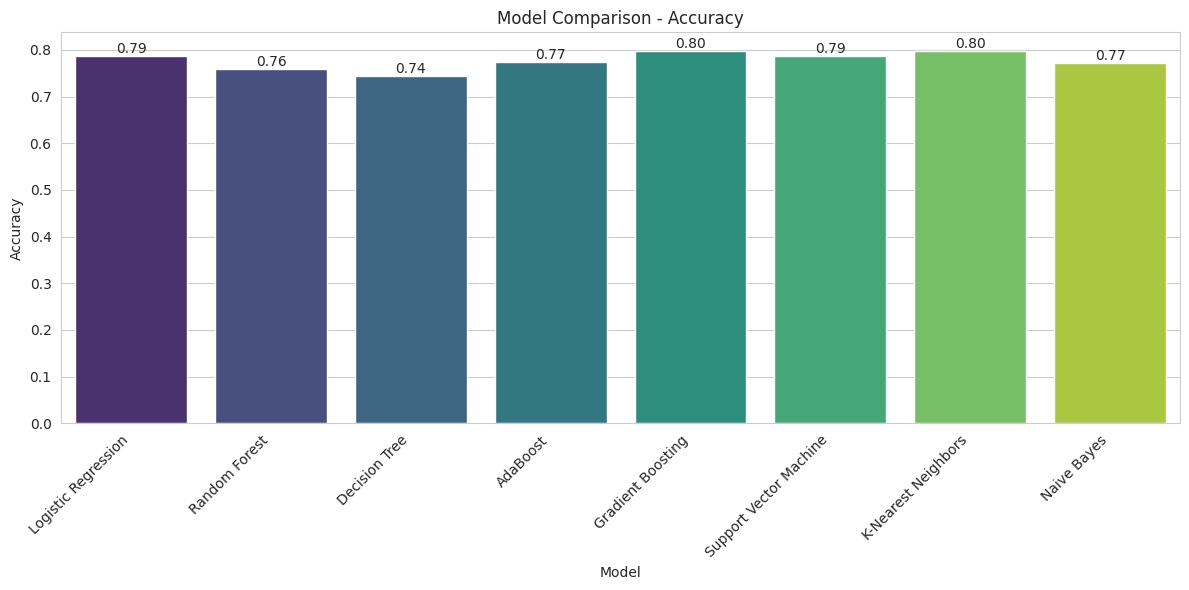

In [32]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x="Model", y="Accuracy", data=metrics_df, palette="viridis")

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Add data labels to the bars
for index, row in metrics_df.iterrows():
    plt.text(
        index,
        row["Accuracy"],
        f"{row['Accuracy']:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Show the plot
plt.tight_layout()
plt.show()